In [206]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score

In [207]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense , TimeDistributed
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [208]:
df = pd.read_csv('D:/HAR/HARTH/S006.csv')
df

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6
...,...,...,...,...,...,...,...,...
408704,2019-01-12 01:09:32.880,-0.690417,0.035710,-0.697054,0.228261,0.072950,0.985175,7
408705,2019-01-12 01:09:32.890,-0.745270,0.032438,-0.681320,-0.121986,0.063700,1.026665,7
408706,2019-01-12 01:09:32.900,-0.684827,0.037622,-0.703884,0.302960,0.076986,0.978313,7
408707,2019-01-12 01:09:32.910,-0.751518,0.028819,-0.668037,-0.241803,0.056675,1.026166,7


In [209]:
df['label'].value_counts()

label
7      253029
6       62682
13      25040
1       24889
8       13036
3       12693
130     11290
14       3130
5        1550
4        1370
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

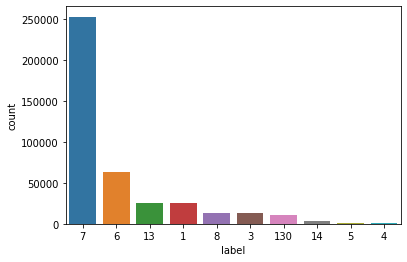

In [210]:
sns.countplot(x = "label", data = df, order = df.label.value_counts().index)

In [211]:
label_encoder = LabelEncoder()

# 'color' 칼럼의 데이터를 학습하고, 숫자로 변환
df['label'] = label_encoder.fit_transform(df['label'])

In [212]:
df['label'].value_counts()

label
5    253029
4     62682
7     25040
0     24889
6     13036
1     12693
9     11290
8      3130
3      1550
2      1370
Name: count, dtype: int64

In [213]:
X = df.drop('label',axis=1)
X.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782


In [214]:
y=df['label']
y.value_counts()

label
5    253029
4     62682
7     25040
0     24889
6     13036
1     12693
9     11290
8      3130
3      1550
2      1370
Name: count, dtype: int64

In [215]:
X.drop('timestamp', axis=1, inplace=True)

In [216]:
X

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z
0,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439
1,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309
2,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212
3,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140
4,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782
...,...,...,...,...,...,...
408704,-0.690417,0.035710,-0.697054,0.228261,0.072950,0.985175
408705,-0.745270,0.032438,-0.681320,-0.121986,0.063700,1.026665
408706,-0.684827,0.037622,-0.703884,0.302960,0.076986,0.978313
408707,-0.751518,0.028819,-0.668037,-0.241803,0.056675,1.026166


In [217]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [218]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [219]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

In [220]:
# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity. 

X_train_seq, y_train_seq = split_sequences(train_set, 5)
print(X_train_seq.shape, y_train_seq.shape)

X_test_seq, y_test_seq = split_sequences(test_set, 5)
print(X_test_seq.shape, y_test_seq.shape)

(326963, 5, 15) (326963,)
(81738, 5, 15) (81738,)


In [226]:
# Convert output variables to categorical for CNN
y_train_onhot = to_categorical(y_train_seq)
print(y_train_onhot.shape)

y_test_onhot = to_categorical(y_test_seq)
print(y_test_onhot.shape)


(326963, 2)
(81738, 2)


In [232]:
model = Sequential()
model.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 128)               73728     
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_32 (Dense)            (None, 128)               16512     
                                                                 
 dense_33 (Dense)            (None, 2)                 258       
                                                                 
Total params: 90498 (353.51 KB)
Trainable params: 90498 (353.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [233]:
train_epochs = 2
history = model.fit(X_train_seq, y_train_onhot, epochs=train_epochs, verbose=True, validation_split=0.1)

Epoch 1/2
9196/9196 [==============================] - 45s 5ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 8.2029e-08 - val_accuracy: 1.0000
Epoch 2/2
 558/9196 [>.............................] - ETA: 37s - loss: 5.7027e-07 - accuracy: 1.0000

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_onehot, axis=-1)

LABELS = ['WALKING_DOWNSTAIRS','JOGGING','WALKING_UPSTAIRS','WALKING']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [ ]:
model.save('D:/HAR/HARTH/my_model.h5')


from tensorflow.keras.models import load_model
loaded_model = load_model('D:/HAR/HARTH/my_model.h5')

In [ ]:
df = pd.read_csv('D:/HAR/HARTH/S008.csv')
df

In [ ]:
sns.countplot(x = "label", data = df, order = df.label.value_counts().index)